3D approximation with the second order

In [1]:
import numpy as np
import math
import math
import distance
from scipy.linalg import svd
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from random import randrange
from numpy import arange
from numpy import meshgrid
from numpy.random import default_rng
from numpy.random import uniform
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 50em; }</style>"))
#%matplotlib notebook


Generation of testing point clouds (on typical surfaces of 2-order)

In [2]:
def conic_func(params, data):
    sum = 0
    for i in range(len(data)):
        sum += (params[9] + params[6]*data[i][0] + params[7]*data[i][1]+ params[8]*data[i][2] + params[0]*data[i][0]**2 + params[1]*data[i][1]**2 + params[2]*data[i][2]**2 + params[3]*data[i][0]*data[i][1] + params[4]*data[i][0]*data[i][2] + params[5]*data[i][1]*data[i][2])**2
    return sum

def grad_conic(params, point):
    return np.array([
        [2*params[0]*point[0]+ params[3]*point[1] + params[4]*point[2] +params[6]],
        [2*params[1]*point[1]+ params[3]*point[0] + params[5]*point[2] +params[7]],
        [2*params[2]*point[2]+ params[4]*point[0]+ params[5]*point[1] + params[8]]
    ])

def sampson_dist(params, data):
    sum = 0
    for i in range(len(data)):
        grad = grad_conic(params, data[i])
        sum += (params[9] + params[6]*data[i][0] + params[7]*data[i][1]+ params[8]*data[i][2] + params[0]*data[i][0]**2 + params[1]*data[i][1]**2 + params[2]*data[i][2]**2 + params[3]*data[i][0]*data[i][1] + params[4]*data[i][0]*data[i][2] + params[5]*data[i][1]*data[i][2])**2/(grad[0]**2 + grad[1]**2 + grad[2]**2)
    return sum

def to_file(filename, points):
    f = open(filename, "w")
    for point in points:
        f.write(str(point[0]) + " " + str(point[1]) + " " + str(point[2]) + "\n")
    f.close
    
    
# sample   #14::-0.9619::-0.5827::-0.0029::0::1::A::1::0::0::0::0;    
def to_inet_file(filename, points):
    f = open(filename, "w")
    for i in range(len(points)):
        f.write("#" + str(i) + "::" + str(points[i][0]) + "::" + str(points[i][1]) + "::" + str(points[i][2]) + "::0::5::A::1::0::0::0::0;\n")
    f.close
    
    
    
def plot_implicit(fn, data, bbox=(-1.5,1.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 150) # resolution of the contour
    B = np.linspace(xmin, xmax, 20) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

    
    
    #plt.show()
    x,y,z = data.T
    ax.scatter3D(x, y, z, 'gray')
    
def plot_implicit_extra(fn, data, extra_data, bbox=(-1.5,1.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 150) # resolution of the contour
    B = np.linspace(xmin, xmax, 20) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

    
    
    #plt.show()
    x,y,z = data.T
    ax.scatter3D(x, y, z, color='gray')
    
    x1,y1,z1 = extra_data.T
    ax.scatter3D(x1, y1, z1, color='red')
    
def sphere(x,y,z):
    return x**2 + y**2 + z**2 - 1

def surf(x,y,z):
    return params[0]*x**2 + params[1]*y**2 + params[2]*z**2 + params[3]*x*y + params[4]*x*z + params[5]*y*z + params[6]*x + params[7]*y + params[8]*z + params[9]

In [3]:
N = 150
a = 1
b = 2
c = 3

def generate_ellipsoid(N, a, b, c, scale):
    surface = []

    theta = uniform(0, np.pi, N)
    phi = uniform(0, 2*np.pi, N)

    for i in range(N):
        surface.append( (a*np.sin(theta[i])*np.cos(phi[i]) + scale * np.random.randn() , b*np.sin(theta[i])*np.sin(phi[i]) + scale * np.random.randn(), c*np.cos(theta[i]) + scale * np.random.randn() ))
    return np.array(surface)

def generate_one_body_hyperboloid(N, a, b, c, scale):
    surface = []

    u = uniform(-1, 1, N)
    phi = uniform(0, 2*np.pi, N)

    for i in range(N):
        surface.append( (a*np.sqrt(1+u[i]**2)*np.cos(phi[i]) + scale * np.random.randn() , b*np.sqrt(1+u[i]**2)*np.sin(phi[i]) + scale * np.random.randn(), c*u[i] + scale * np.random.randn() ))
    return np.array(surface)

def generate_two_body_hyperboloid(N, a, b, c, scale):
    surface = []

    u = uniform(-1, 1, N)
    phi = uniform(0, 2*np.pi, N)

    for i in range(int(N/2)):
        surface.append( (a*np.sinh(u[i])*np.cos(phi[i]) + scale * np.random.randn() , b*np.sinh(u[i])*np.sin(phi[i]) + scale * np.random.randn(), c*np.cosh(u[i]) + scale * np.random.randn() ))
    for i in range(int(N/2), N):
        surface.append( (a*np.sinh(u[i])*np.cos(phi[i]) + scale * np.random.randn() , b*np.sinh(u[i])*np.sin(phi[i]) + scale * np.random.randn(), -c*np.cosh(u[i]) + scale * np.random.randn() ))
    return np.array(surface)

def generate_hyperbolic_paraboloid(N, a, b, c, scale):
    surface = []

    u = uniform(-1, 1, N)
    v = uniform(-1, 1, N)

    for i in range(N):
        surface.append( (a*u[i] + scale * np.random.randn() , b*v[i] + scale * np.random.randn(), c*(u[i]**2 - v[i]**2) + scale * np.random.randn() ))
    return np.array(surface)

def generate_elliptic_paraboloid(N, a, b, c, scale):
    surface = []

    u = uniform(0, 1, N)
    phi = uniform(0, 2*np.pi, N)

    for i in range(N):
        surface.append( (a*np.sqrt(u[i])*np.cos(phi[i]) + scale * np.random.randn() , b*np.sqrt(u[i])*np.sin(phi[i]) + scale * np.random.randn(), c*u[i] + scale * np.random.randn() ))
    return np.array(surface)

def generate_parabolic_cylinder(N, a, b, c, scale):
    surface = []

    u = uniform(-1, 1, N)
    v = uniform(-1, 1, N)

    for i in range(N):
        surface.append( (a*u[i] + scale * np.random.randn() , b*v[i] + scale * np.random.randn(), c*u[i]**2 + scale * np.random.randn() ))
    return np.array(surface)

def generate_elliptic_cylinder(N, a, b, c, scale):
    surface = []

    u = uniform(-1, 1, N)
    v = uniform(0, 2*np.pi, N)

    for i in range(N):
        surface.append( (a*np.cos(v[i]) + scale * np.random.randn() , c*np.sin(v[i]) + scale * np.random.randn(),  b*u[i] + scale * np.random.randn() ))
    return np.array(surface)

def generate_hyperbolic_cylinder(N, a, b, c, scale):
    surface = []

    u = uniform(-2, 2, N)
    v = uniform(-2, 2, N)

    for i in range(N):
        surface.append( (a*np.cosh(v[i]) + scale * np.random.randn() , c*np.sinh(v[i]) + scale * np.random.randn(),  b*u[i] + scale * np.random.randn() ))
    return np.array(surface)

def generate_cone(N, a, b, c, scale):
    surface = []

    u = uniform(-2, 2, N)
    v = uniform(0, 2*np.pi, N)

    for i in range(N):
        surface.append( (a*u[i]*np.cos(v[i]) + scale * np.random.randn() , c*u[i]*np.sin(v[i]) + scale * np.random.randn(),  b*u[i] + scale * np.random.randn() ))
    return np.array(surface)


def generate_plane(N, a, b, c, scale):
    surface = []

    u = uniform(-3, 3, N)
    v = uniform(-3, 3, N)

    for i in range(N):
        surface.append(( 1/a*(-b*u[i] - c*v[i] - 1) + scale * np.random.randn() , u[i] + scale * np.random.randn(),  v[i] + scale * np.random.randn() ))
    return np.array(surface)

In [7]:
ellipsoid = generate_ellipsoid(N, a, b, c, 0.1)
one_hyperboloid = generate_one_body_hyperboloid(N, a, b, c, 0.1)
two_hyperboloid = generate_two_body_hyperboloid(N, a, b, c, 0.1)
hyperbolic_paraboloid = generate_hyperbolic_paraboloid(N, a, b, c, 0.1)
elliptic_paraboloid = generate_elliptic_paraboloid(N, a, b, c, 0.1)
parabolic_cylinder = generate_parabolic_cylinder(N, a, b, c, 0.1)
elliptic_cylinder = generate_elliptic_cylinder(N, a, b, c, 0.1)
hyperbolic_cylinder = generate_hyperbolic_cylinder(N, a, b, c, 0.1)
cone = generate_cone(N, a, b, c, 0.1)

In [188]:
to_file("ellipsoid.txt", ellipsoid)
np.savetxt("ellipsoid.csv", ellipsoid, fmt='%.2f' ,delimiter=",")

to_file("one_hyperboloid.txt", one_hyperboloid)
np.savetxt("one_hyperboloid.csv", one_hyperboloid, fmt='%.2f' ,delimiter=",")

to_file("two_hyperboloid.txt", two_hyperboloid)
np.savetxt("two_hyperboloid.csv", two_hyperboloid, fmt='%.2f' ,delimiter=",")

to_file("hyperbolic_paraboloid.txt", hyperbolic_paraboloid)
np.savetxt("hyperbolic_paraboloid.csv", hyperbolic_paraboloid,fmt='%.2f' , delimiter=",")

to_file("elliptic_paraboloid.txt", elliptic_paraboloid)
np.savetxt("elliptic_paraboloid.csv", elliptic_paraboloid,fmt='%.2f' , delimiter=",")

to_file("parabolic_cylinder.txt", parabolic_cylinder)
np.savetxt("parabolic_cylinder.csv", parabolic_cylinder,fmt='%.2f' , delimiter=",")

to_file("elliptic_cylinder.txt", elliptic_cylinder)
np.savetxt("elliptic_cylinder.csv", elliptic_cylinder, fmt='%.2f' ,delimiter=",")

to_file("hyperbolic_cylinder.txt", hyperbolic_cylinder)
np.savetxt("hyperbolic_cylinder.csv", hyperbolic_cylinder, fmt='%.2f' ,delimiter=",")

to_file("cone.txt", cone)
np.savetxt("cone.csv", cone,fmt='%.2f' , delimiter=",")


In [219]:
plane = generate_plane(N, a, b, c, 0.1)
np.savetxt("plane.csv", plane,fmt='%.2f' , delimiter=",")

In [24]:
half_hyperbolic_cylinder = []
for point in hyperbolic_cylinder:
    if point[0] > 0 and point[2] > 0:
        half_hyperbolic_cylinder.append(point)
        
half_hyperbolic_cylinder = np.array(half_hyperbolic_cylinder)
np.savetxt("half_hyperbolic_cylinder.csv", half_hyperbolic_cylinder,fmt='%.2f' , delimiter=",")

quarter_hyperbolic_cylinder = []
for point in hyperbolic_cylinder:
    if point[0] > 0 and point[2] > 0 and point[1] > 0:
        quarter_hyperbolic_cylinder.append(point)
quarter_hyperbolic_cylinder = np.array(quarter_hyperbolic_cylinder)
np.savetxt("quarter_hyperbolic_cylinder.csv", quarter_hyperbolic_cylinder,fmt='%.2f' , delimiter=",")

quarter_ellipsoid = []
for point in ellipsoid:
    if point[0] > 0 and point[2] > 0 and point[1] > 0:
        quarter_ellipsoid.append(point)
quarter_ellipsoid = np.array(quarter_ellipsoid)
np.savetxt("quarter_ellipsoid.csv", quarter_ellipsoid,fmt='%.2f' , delimiter=",")

half_ellipsoid = []
for point in ellipsoid:
    if point[0] > 0 and point[2] > 0:
        half_ellipsoid.append(point)
        
half_ellipsoid = np.array(half_ellipsoid)
np.savetxt("half_ellipsoid.csv", half_ellipsoid,fmt='%.2f' , delimiter=",")

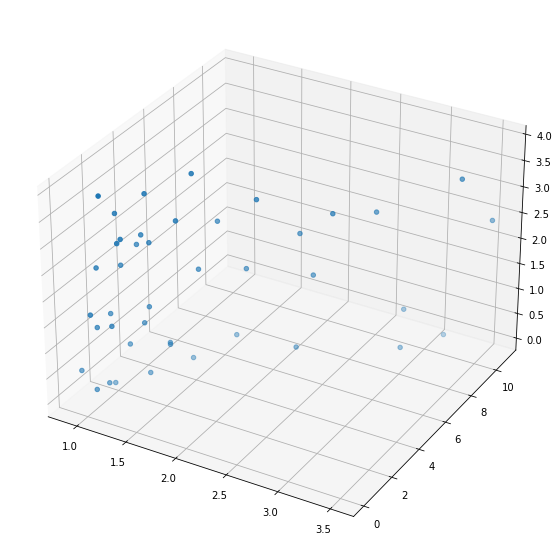

In [25]:
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')




x,y,z = quarter_hyperbolic_cylinder.T
ax.scatter3D(x, y, z, 'gray')

Main algorithm with reweighting procedure

In [4]:
eps = 0.00000000001

    
def weighted_alg_lin_method(data, weights):
    x = np.array([[
            data[0][0]**2,
            data[0][1]**2,
            data[0][2]**2,
            data[0][0]*data[0][1],
            data[0][0]*data[0][2],
            data[0][1]*data[0][2],
            data[0][0],
            data[0][1],
            data[0][2],
            1
            ]])
    matrix = weights[0]*np.matmul(x.T, x)
    
    for i in range(1,len(data)):
        row = np.array([[
            data[i][0]**2,
            data[i][1]**2,
            data[i][2]**2,
            data[i][0]*data[i][1],
            data[i][0]*data[i][2],
            data[i][1]*data[i][2],
            data[i][0],
            data[i][1],
            data[i][2],
            1
        ]])
        matrix += weights[i]*np.matmul(row.T, row)
        
    min = np.inf
    min_k = 0
    k = 0
    for vector in svd(matrix)[2]:
        sum = 0
        for elem in vector:
            sum += elem*elem
        vector /= np.sqrt(sum)
        if sampson_dist(vector, data) < min:
            min = sampson_dist(vector, data)
            min_k = k
        k += 1
    vector = svd(matrix)[2][min_k]
    sum = 0
    for elem in vector:
        sum += elem*elem
    vector /= np.sqrt(sum)
    return vector
    
def reweighted_alg_lin_method(data):
    weights = np.ones(len(data))
    params = weighted_alg_lin_method(data, weights)
    result_params = params
    print("Initial functional value =", sampson_dist(result_params, data))
    j = 0
    while True:
        
        print("itteration", j)
        params = result_params
        weights = np.array([])
        for i in range(len(data)):
            grad = grad_conic(params, data[i])
            weights = np.append(weights, 1/(grad[0]**2 + grad[1]**2 + grad[2]**2))
        result_params = weighted_alg_lin_method(data, weights)
        print("New functional value =", sampson_dist(result_params, data))
        j += 1
        if sampson_dist(result_params, data) >=  sampson_dist(params, data):
            break
    if sampson_dist(result_params, data) < (1 - eps) * sampson_dist(params, data):
        return result_params
    else:
        return params
    
def plane_fitting(points):
    res = np.matmul( np.matmul(  np.linalg.inv(np.matmul( points.T, points)), points.T), -1*np.ones( (points.shape[0], 1))) 
    A = res[0][0]
    B = res[1][0]
    C = res[2][0]
    return [0, 0, 0, 0, 0, 0, A, B, C, 1]

# plane : 0x^2 + 0y^2 + 0z^2 + 0xy + 0xz + 0yz + Ax + By + Cz + 1 = 0
def dist_to_plane(point, plane):
    return ( np.sqrt( (plane[6]*point[0] +plane[7]*point[1] + plane[8]*point[2] + 1)**2 ) )/(np.sqrt(plane[6]**2 +plane[7]**2 + plane[8]**2 ))

In [30]:
# load data from home library

with open('data/ball6.txt','r') as verts:
    ball = []
    for line in verts:
        point = [float(s) for s in line.split()]
        ball.append(point)

In [31]:
# make it sparse

sparse_ball = []
for i in range(0, len(ball), 50):
    sparse_ball.append(ball[i])
    
len(sparse_ball)

400

In [32]:
params = reweighted_alg_lin_method(np.array(ball))
params_surf = params
print(params)
print("%.2fx^2 + %.2fy^2 + %.2fz^2+ %.2fxy+ %.2fxz+ %.2fyz+ %.2fx+ %.2fy + %.2fz + %.2f" % (params[0], params[1], params[2], params[3], params[4], params[5], params[6], params[7], params[8], params[9]))
print("%.8fx^2 + %.8fy^2 + %.8fz^2+ %.8fxy+ %.8fxz+ %.8fyz+ %.8fx+ %.f8y + %.8fz + %.8f" % (params[0], params[1], params[2], params[3], params[4], params[5], params[6], params[7], params[8], params[9]))

Initial functional value = [0.02156543]
itteration 0
New functional value = [0.02152087]
itteration 1
New functional value = [0.0215211]
[-1.93234225e-02 -5.31604674e-04 -3.85893809e-01  1.69476116e-02
  1.90350041e-01 -3.52369436e-01 -3.18348637e-03 -2.93981769e-01
  5.59797580e-01  5.38719748e-01]
-0.02x^2 + -0.00y^2 + -0.39z^2+ 0.02xy+ 0.19xz+ -0.35yz+ -0.00x+ -0.29y + 0.56z + 0.54
-0.01932342x^2 + -0.00053160y^2 + -0.38589381z^2+ 0.01694761xy+ 0.19035004xz+ -0.35236944yz+ -0.00318349x+ -08y + 0.55979758z + 0.53871975


/var/folders/64/8wd7l9zd709fzvrfc3z9pzdr0000gn/T/ipykernel_43726/2112984250.py:51: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z], zdir='z')


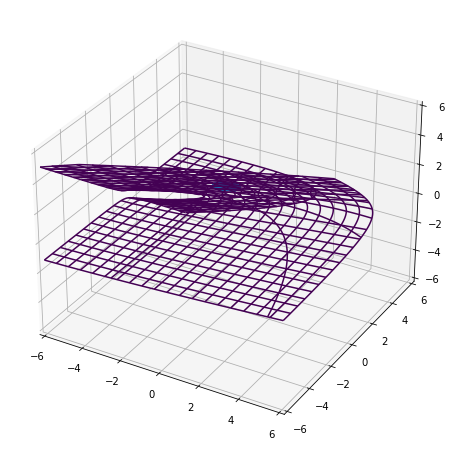

In [33]:
with plt.ion():
    plot_implicit(surf, np.array(ball), (-6,6))
    
    

In [34]:
params_plane = plane_fitting(np.array(ball))
plane = [params_plane[6], params_plane[7], params_plane[8], 1]
print(params_plane)

[0, 0, 0, 0, 0, 0, 0.17814363955656898, -0.45565329021404055, -0.47355807051056137, 1]


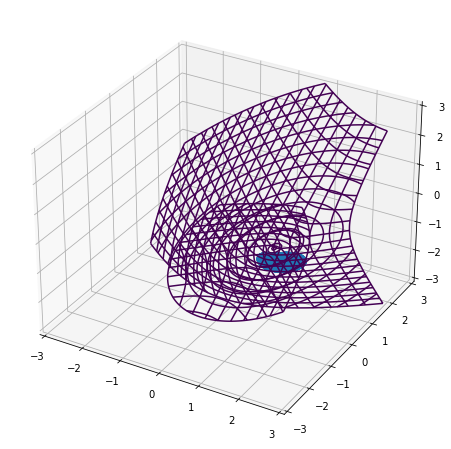

In [27]:
with plt.ion():
    plot_implicit(surf, np.array(ball), (-3,3))

An experiment on real data.

We will use unsimplifed 3D representation of Pear diamond, which was made by the tomographical photo. 

The plan is to take a random point $A = (x_A, y_A, z_A)$ from this representation $M$ and every point from it in a $r$ distance from $A$:

$$ S(A,r) = \{ p \in M :\;\;\; |p - a| < R\} $$

In [5]:
# from octonus file to mine

# vertices = open('data/vertices.txt','w')

# with open('/Users/valeriy/Documents/octonus/B-1843-0.987_precise_6041418/experiment.txt','r') as diamond:
#     w = [int(x) for x in next(diamond).split()][0]
#     for line in diamond:
#         if line[1] == 'n':
#             continue
#         else:
#             for i in range(len(line)):
#                 if i > 1:
#                     vertices.write(line[i])



In [5]:
# from my file to variable


with open('data/vertices.txt','r') as verts:
    diamond = []
    for line in verts:
        point = [float(s) for s in line.split()]
        diamond.append(point)
        
    

In [13]:
# make sparse model
sparse_diamond = []

for i in range(len(diamond)):
    if i % 300 == 0:
        sparse_diamond.append(diamond[i])
        
        

In [15]:
to_file("segmentations/sparse_model.txt", sparse_diamond)

19988


<IPython.core.display.Javascript object>


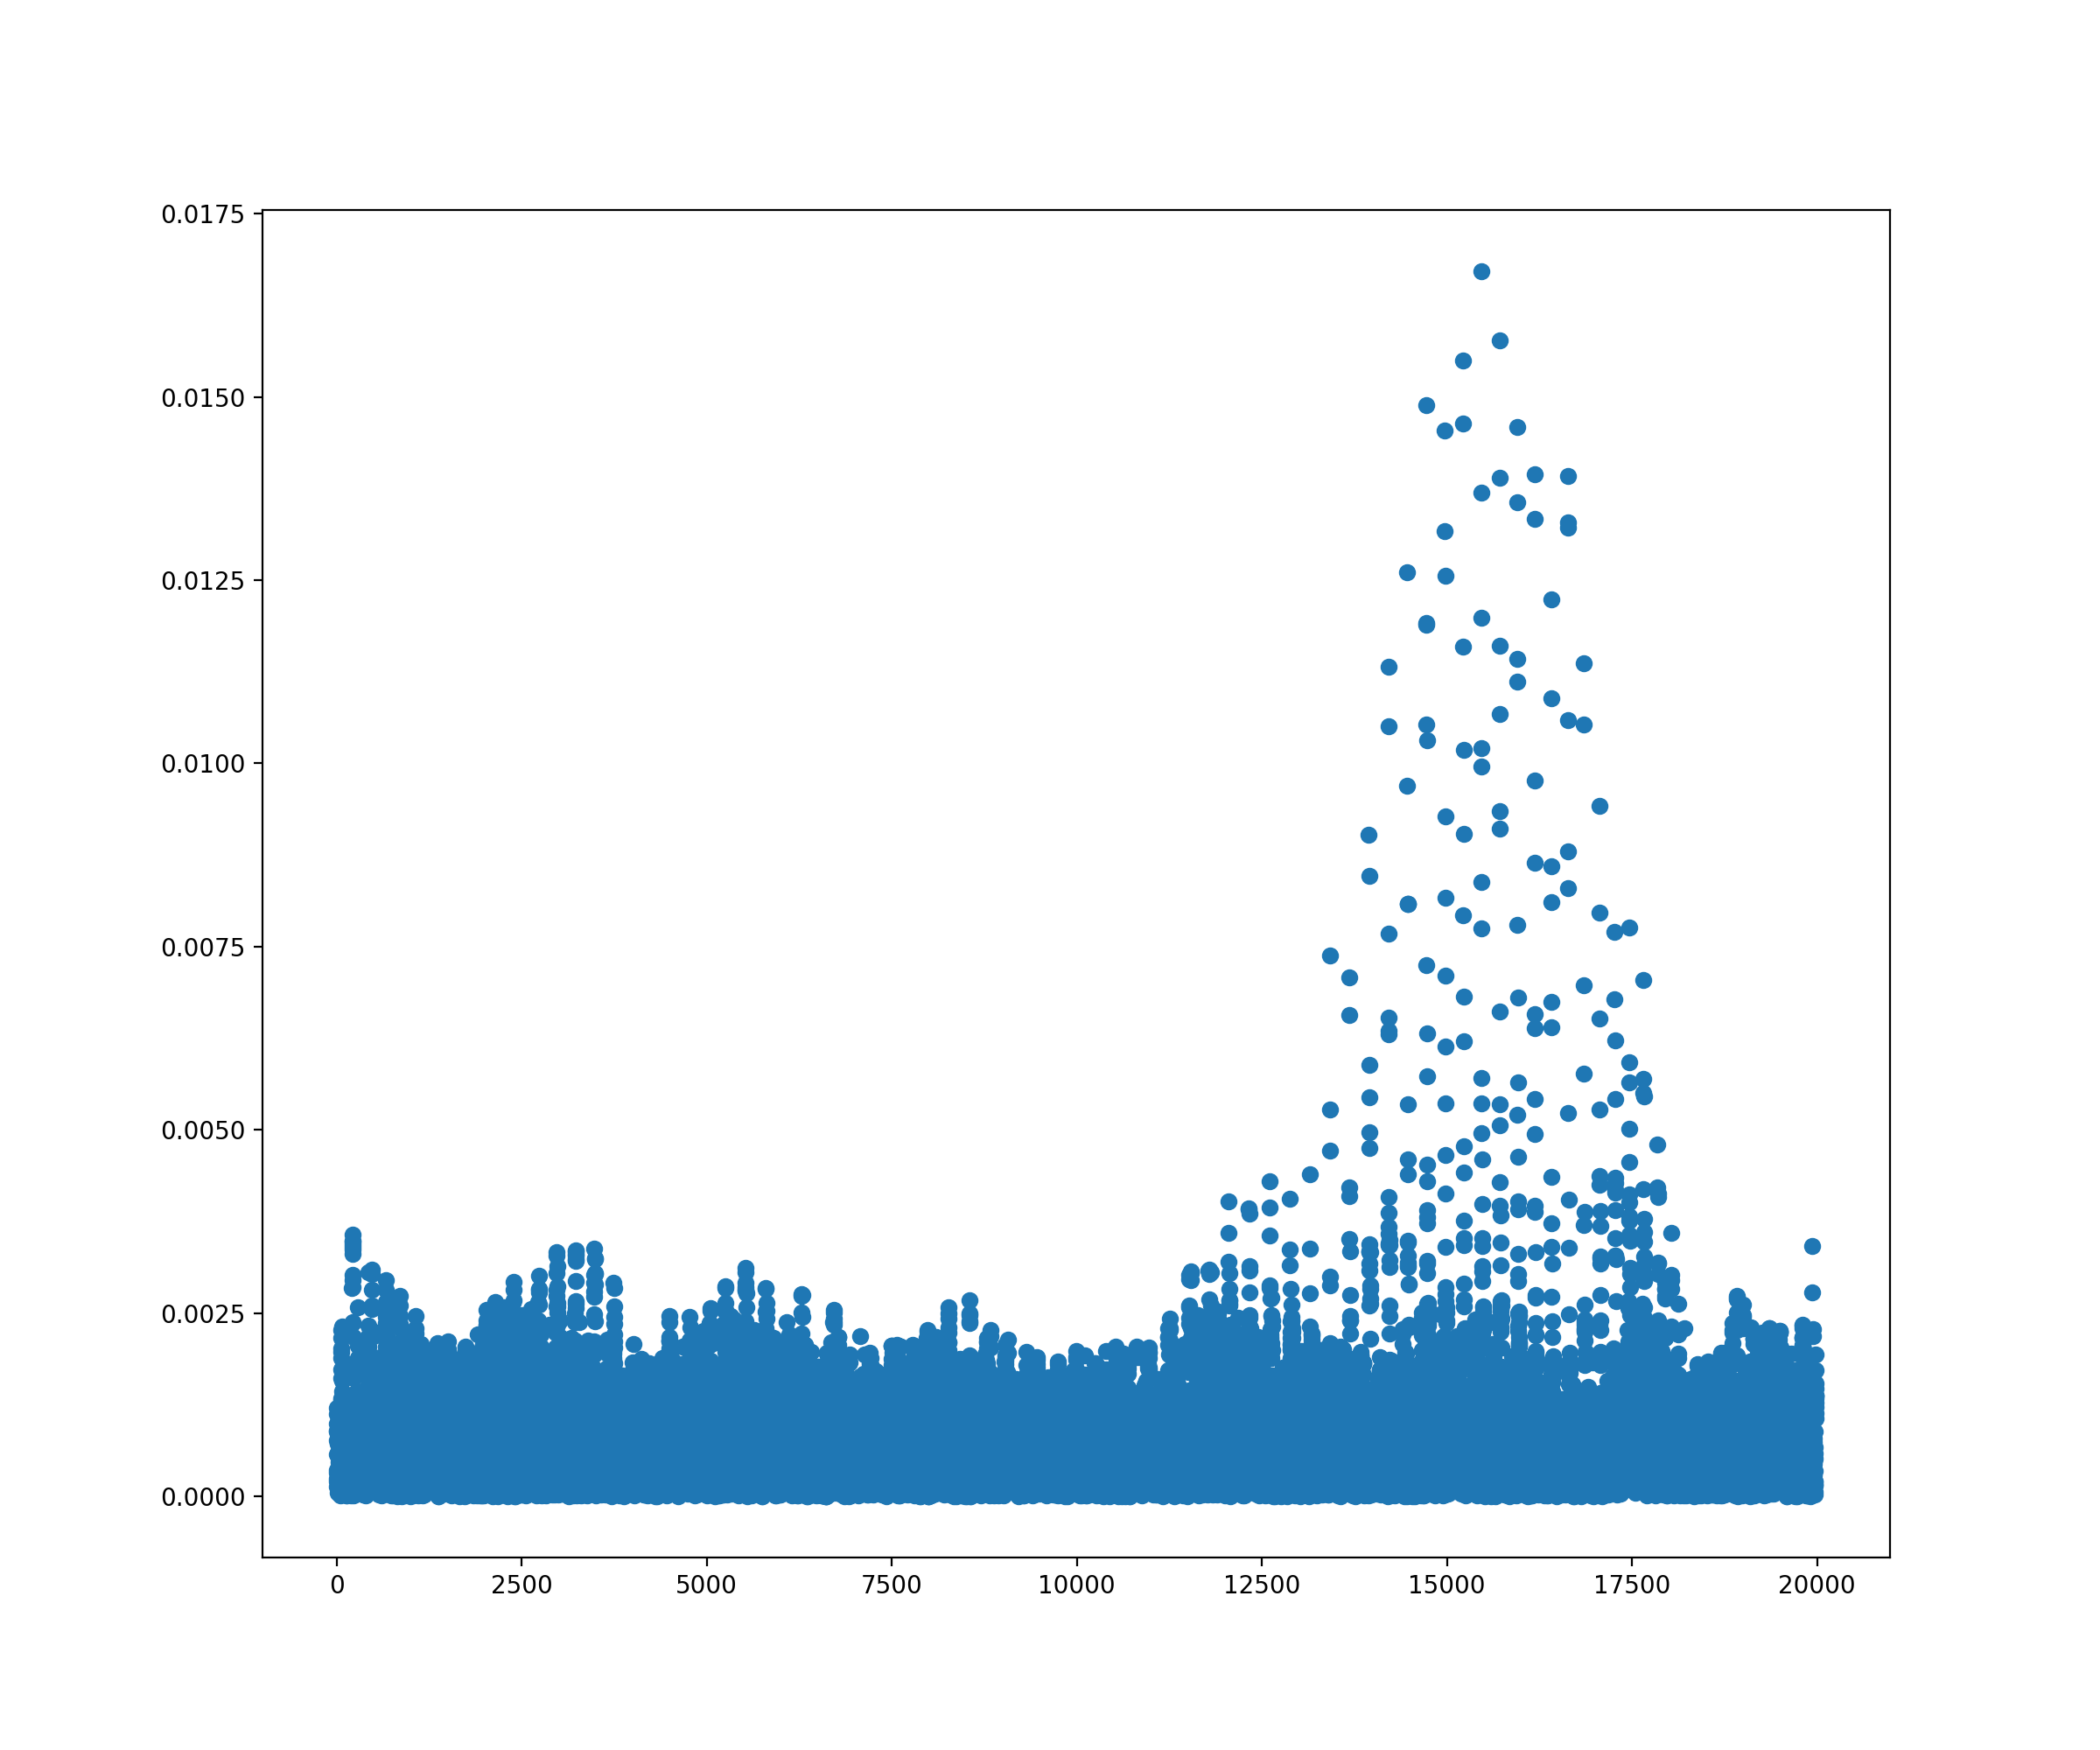

[0.0000e+00 1.0000e+00 2.0000e+00 ... 1.9985e+04 1.9986e+04 1.9987e+04] [0.00057622 0.00076239 0.00120346 ... 0.00193391 0.00146576 0.00113987]


In [51]:
N = randrange(len(diamond))
ball = []
R = 0.5
first_point = diamond[N]
for point in diamond:
    if (point[0]- first_point[0])**2 + (point[1]- first_point[1])**2 + (point[2]- first_point[2])**2 <= R**2:
        ball.append(point)
print(len(ball))

square = []
for point in diamond:
    if abs(point[0]- first_point[0]) <= 0.8 and abs(point[1]- first_point[1]) <= 0.2 and abs(point[2]- first_point[2]) <= 0.2:
        square.append(point)

params = plane_fitting(np.array(ball))
plane = [params[6], params[7], params[8]]
graph = []

for i in range(len(ball)):
    dist = dist_to_plane(ball[i], params)
    graph.append([i, dist])
    

fig = plt.figure(figsize=(12, 10))
ax = plt.axes()

x,y = np.array(graph).T
print(x, y)
ax.scatter(x, y)

In [60]:
to_file("data/ball6.txt", ball)
to_inet_file("data/ball_inet6.txt", ball)
np.savetxt("data/ball6.csv", ball, fmt='%.2f' ,delimiter=",")

to_file("data/square6.txt", square)
np.savetxt("data/square6.csv", square, fmt='%.2f' ,delimiter=",")



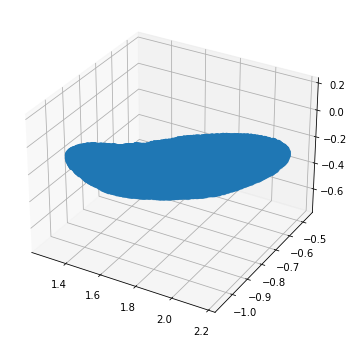

In [28]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')




x,y,z = np.array(ball).T
ax.scatter3D(x, y, z, 'gray')



Now will try to build cylinder on Liza's facets from simplified model.

In [153]:
# polygone
polygone = {"vertices":[],
           "facets":[],
           "bones":[]}
with open('Poly.txt','r') as poly:
    next(poly)
    
    # getting parametrs of poly
    num_of_vertices, num_of_sides, num_of_bones = [int(x) for x in next(poly).split()]

    # going to vertices (jump over #)
    next(poly)
    
    # setting vertices
    i = 0
    for line in poly:
        if i < num_of_vertices:
            id, x, y ,z = [float(x) for x in line.split()]
            polygone["vertices"].append([x, y ,z])
            i += 1
        else:
            break
    
    
    # setting facets
    i = 0
    
    
    for line in poly:
        
        if i < 2*num_of_sides - 1 :
            if not(i & 1):
                side = [int(x) for x in line.split()]
                num_of_verts_in_side = side[1]
                
                side_to_append = []
                for j in range(2,num_of_verts_in_side + 2):
                    
                    side_to_append.append( polygone["vertices"][side[j]] )
                polygone["facets"].append(side_to_append)

                i += 1
            else: 
                i += 1
        else:
            break
    

In [155]:
sides = []
with open('Ids.txt','r') as ids:
    next(ids)
    for line in ids:
        sides = [int(x) for x in line.split()]

In [178]:
girdle = []
half_girdle = []
half_girdle_other = []
half_girdle_non_standart = []
half_girdle_non_standart_other = []
for side in sides:
    for point in polygone["facets"][side]:
        girdle.append(point)
        if 4/3 * point[0] + point[1] >= 0:
            half_girdle.append(point)
        else:
            half_girdle_other.append(point)
        if 4/3 * point[0]>= 0:
            half_girdle_non_standart.append(point)
        else:
            half_girdle_non_standart_other.append(point)

In [183]:
to_file("data/half_girdle_non_standart_other.txt", half_girdle_non_standart_other)
np.savetxt("data/half_girdle_non_standart_other.csv", half_girdle_non_standart_other, fmt='%.2f' ,delimiter=",")

In [182]:
to_file("data/half_girdle_non_standart.txt", half_girdle_non_standart)
np.savetxt("data/half_girdle_non_standart.csv", half_girdle_non_standart, fmt='%.2f' ,delimiter=",")

Implementation of distance function

In [97]:
average = 0

for point in sparse_ball:
    average += dist_to_plane(point, plane)
average /= len(sparse_ball)



print("Average distance to plane =", average)


average = 0
for point in sparse_ball:
    average += np.min(distance.distance(point, params))
average /= len(sparse_ball)


print("Average distance to surface =", average)

Average distance to plane = 0.016478207989452327
Average distance to surface = 0.10628824628368717


The goal here is to compare two functionals.

In [13]:
# surf1 is thought to be a plane
def test(points, surf1, surf2, filename):
    
    # my functional
    average = 0
    average += sampson_dist(surf1, points)[0]
    average /= len(points)
    print("Average of my functional on plane =", '%.12f' % average)
    print(len(points))
    
    average = 0
    average += sampson_dist(surf2, points)[0]
    average /= len(points)
    print("Average of my functional on surface =", '%.12f' % average)
    print(len(points))
    
    

    
    # real dist 
    name = filename + "_plane.txt"
    f = open(name, "w")
    graph_plane = []
    
    average = 0
    for i in range(len(points)):
        dist = dist_to_plane(points[i], surf1)
        average += dist
        f.write(str(i) + " " + str(dist) + "\n")
        graph_plane.append([i, dist])
    average /= len(points)
    print("Average distance to plane =", average)
    print(len(points))
    f.close()
    
    
    name = filename + "_surf.txt"
    f = open(name, "w")
    graph_surf = []
    big_points = []
    
    average = 0
    for i in range(len(points)):
        dist = np.inf
        
        for pair in distance.distance(points[i], surf2):
            if pair[1] < dist:
                dist = pair[1]
                big_point = pair[0]
        if dist > 0.1:
            big_points.append(points[i], big_point)
        average += dist
        f.write(str(i) + " " + str(dist )+ "\n")
        graph_surf.append([i, dist])
    average /= len(points)
    print("Average distance to surface =", average)
    print(len(points))
    return np.array(graph_plane), np.array(graph_surf), np.array(big_points)
    

In [35]:
graph_plane_ball_4, graph_surf_ball_4, outliers = test(sparse_ball, params_plane, params_surf, "ball4_dist")



Average of my functional on plane = 0.000001037160
400
Average of my functional on surface = 0.000000803654
400
Average distance to plane = 0.0007978993225838753
400
Average distance to surface = 0.0007230366869913346
400


Average of my functional on plane = 0.000486908314
19833


Average of my functional on surface = 0.000011619385
19833


Average distance to plane = 0.01751263598543886
19833

================================================


Average of my functional on plane = 0.000488821027
397


Average of my functional on surface = 0.000013465240
397


Average distance to plane = 0.017520593998797955
397


Average distance to surface = 0.027738912179832764
397



These results show that we can calculate distances using sparse_ball

Now let's sort distances and see, how they are distributed along plane and surface.

<IPython.core.display.Javascript object>


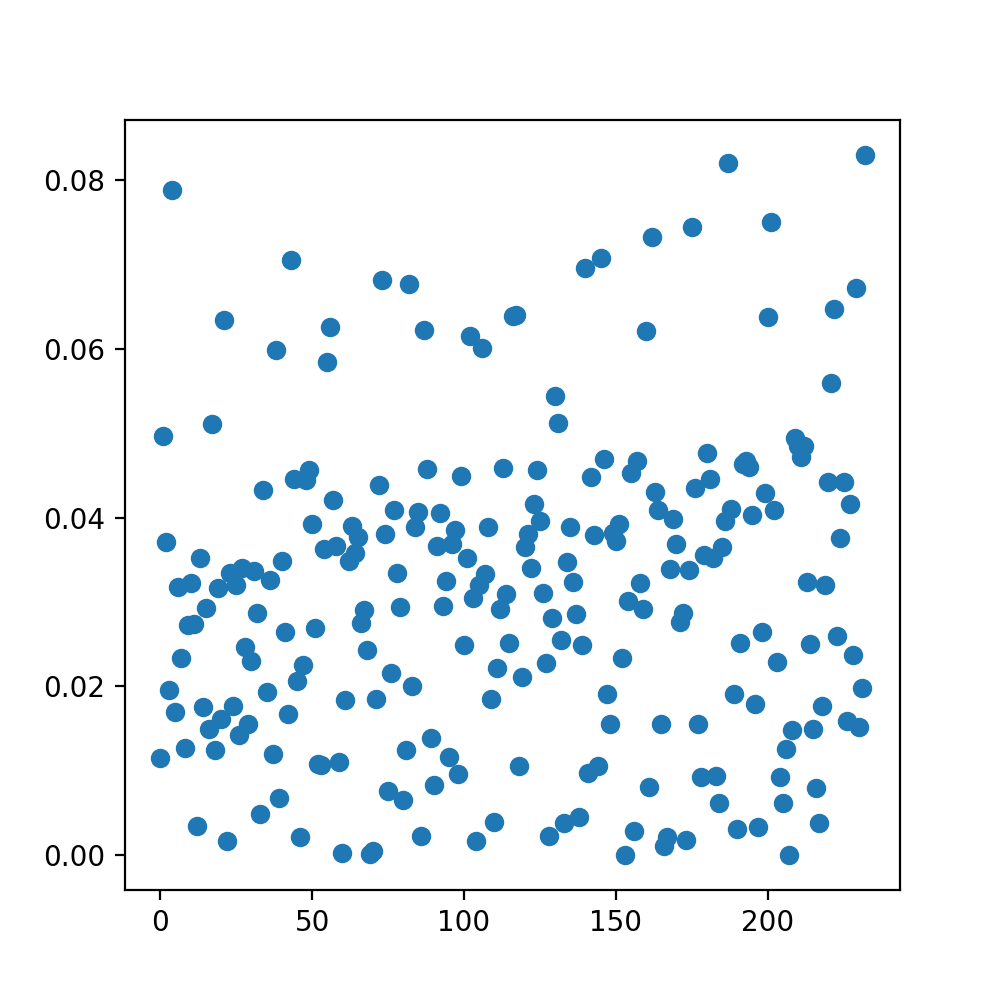

In [170]:
# graph of distances to plane without sorting
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

x,y = np.array(graph_plane_ball_4).T
ax.scatter(x, y)


<IPython.core.display.Javascript object>


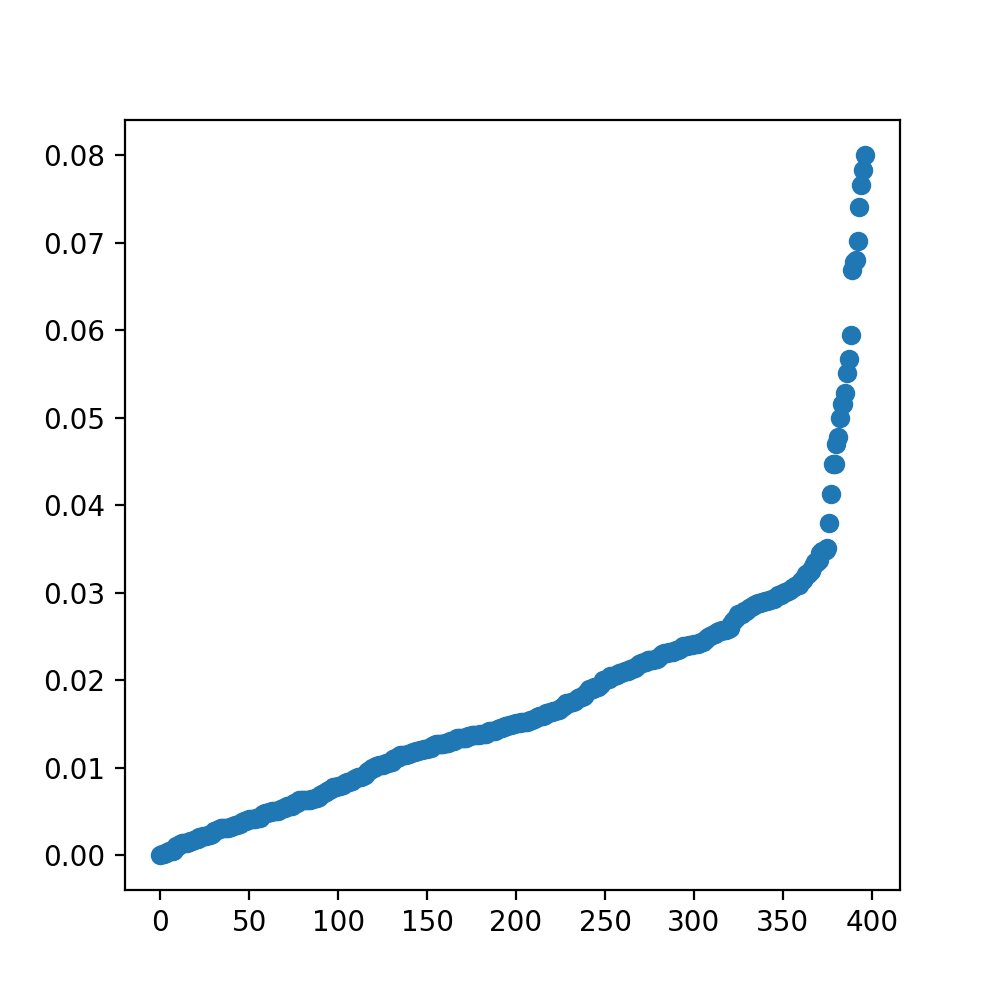

In [102]:
# graph of sorted distances to plane
graph_plane_ball_5 = graph_plane_ball_5[graph_plane_ball_5[:, 1].argsort()]

graph_plane_ball_5_sorted = graph_plane_ball_5
for i in range(len(graph_plane_ball_5)):
    graph_plane_ball_5_sorted[i][0] = i

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

x,y = np.array(graph_plane_ball_5_sorted).T
ax.scatter(x, y)

<IPython.core.display.Javascript object>


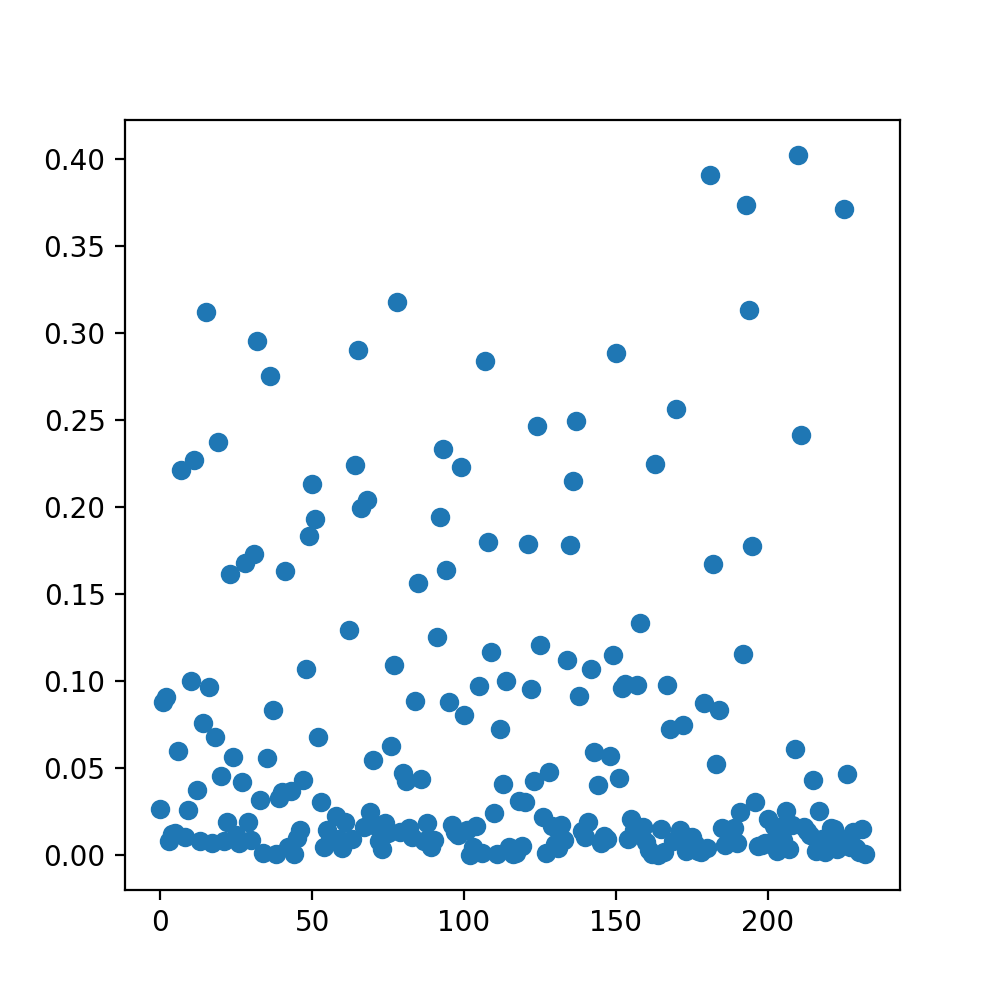

In [171]:
# graph of distances to surface without sorting
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

x,y = np.array(graph_surf_ball_4).T
ax.scatter(x, y)

<IPython.core.display.Javascript object>


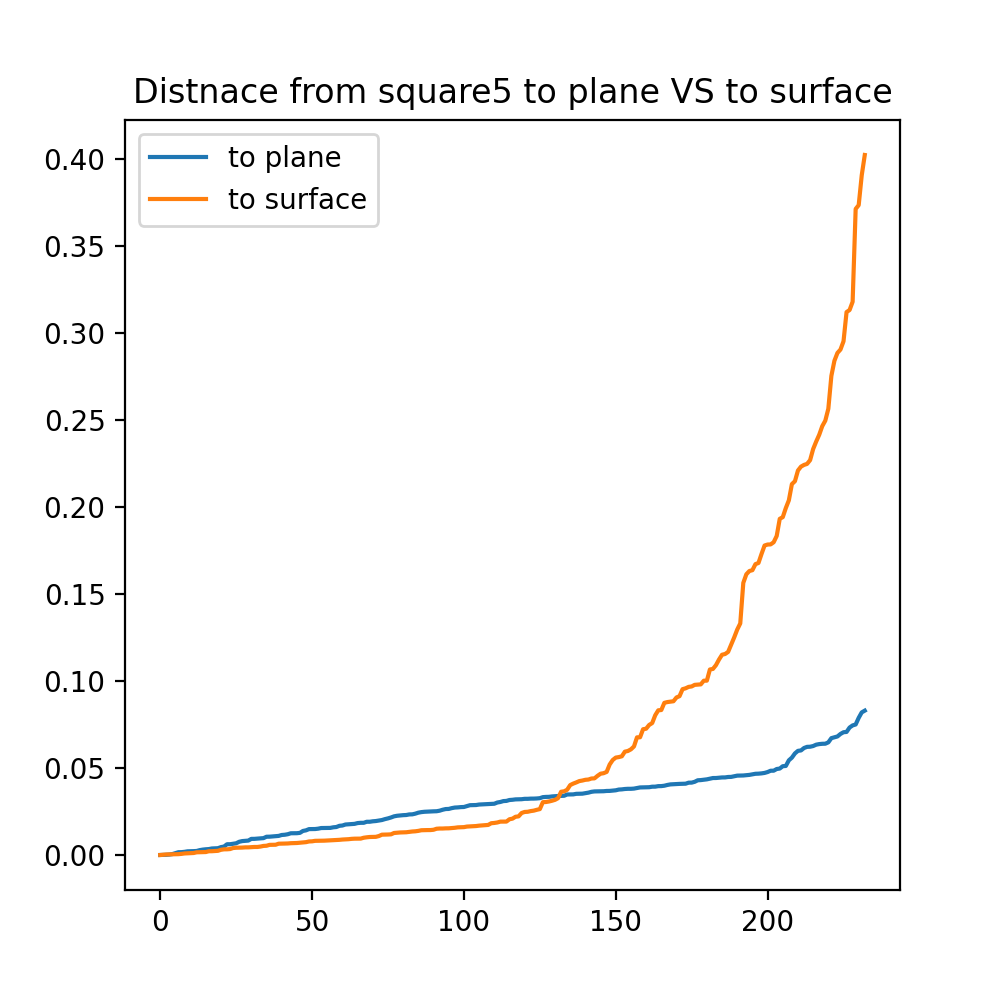

In [180]:
# graph of sorted distances to plane
graph_plane_ball_4 = graph_plane_ball_4[graph_plane_ball_4[:, 1].argsort()]

graph_plane_ball_4_sorted = graph_plane_ball_4
for i in range(len(graph_plane_ball_4)):
    graph_plane_ball_4_sorted[i][0] = i

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

x,y = np.array(graph_plane_ball_4_sorted).T
#ax.scatter(x, y)
plt.plot(x, y, label="to plane")

# graph of sorted distances to surface
graph_surf_ball_4 = graph_surf_ball_4[graph_surf_ball_4[:, 1].argsort()]

graph_surf_ball_4_sorted = graph_surf_ball_4
for i in range(len(graph_surf_ball_4)):
    graph_surf_ball_4_sorted[i][0] = i


x1,y1 = np.array(graph_surf_ball_4_sorted).T
#ax.scatter(x, y)
plt.plot(x1, y1, label="to surface")
plt.title("Distnace from square5 to plane VS to surface")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


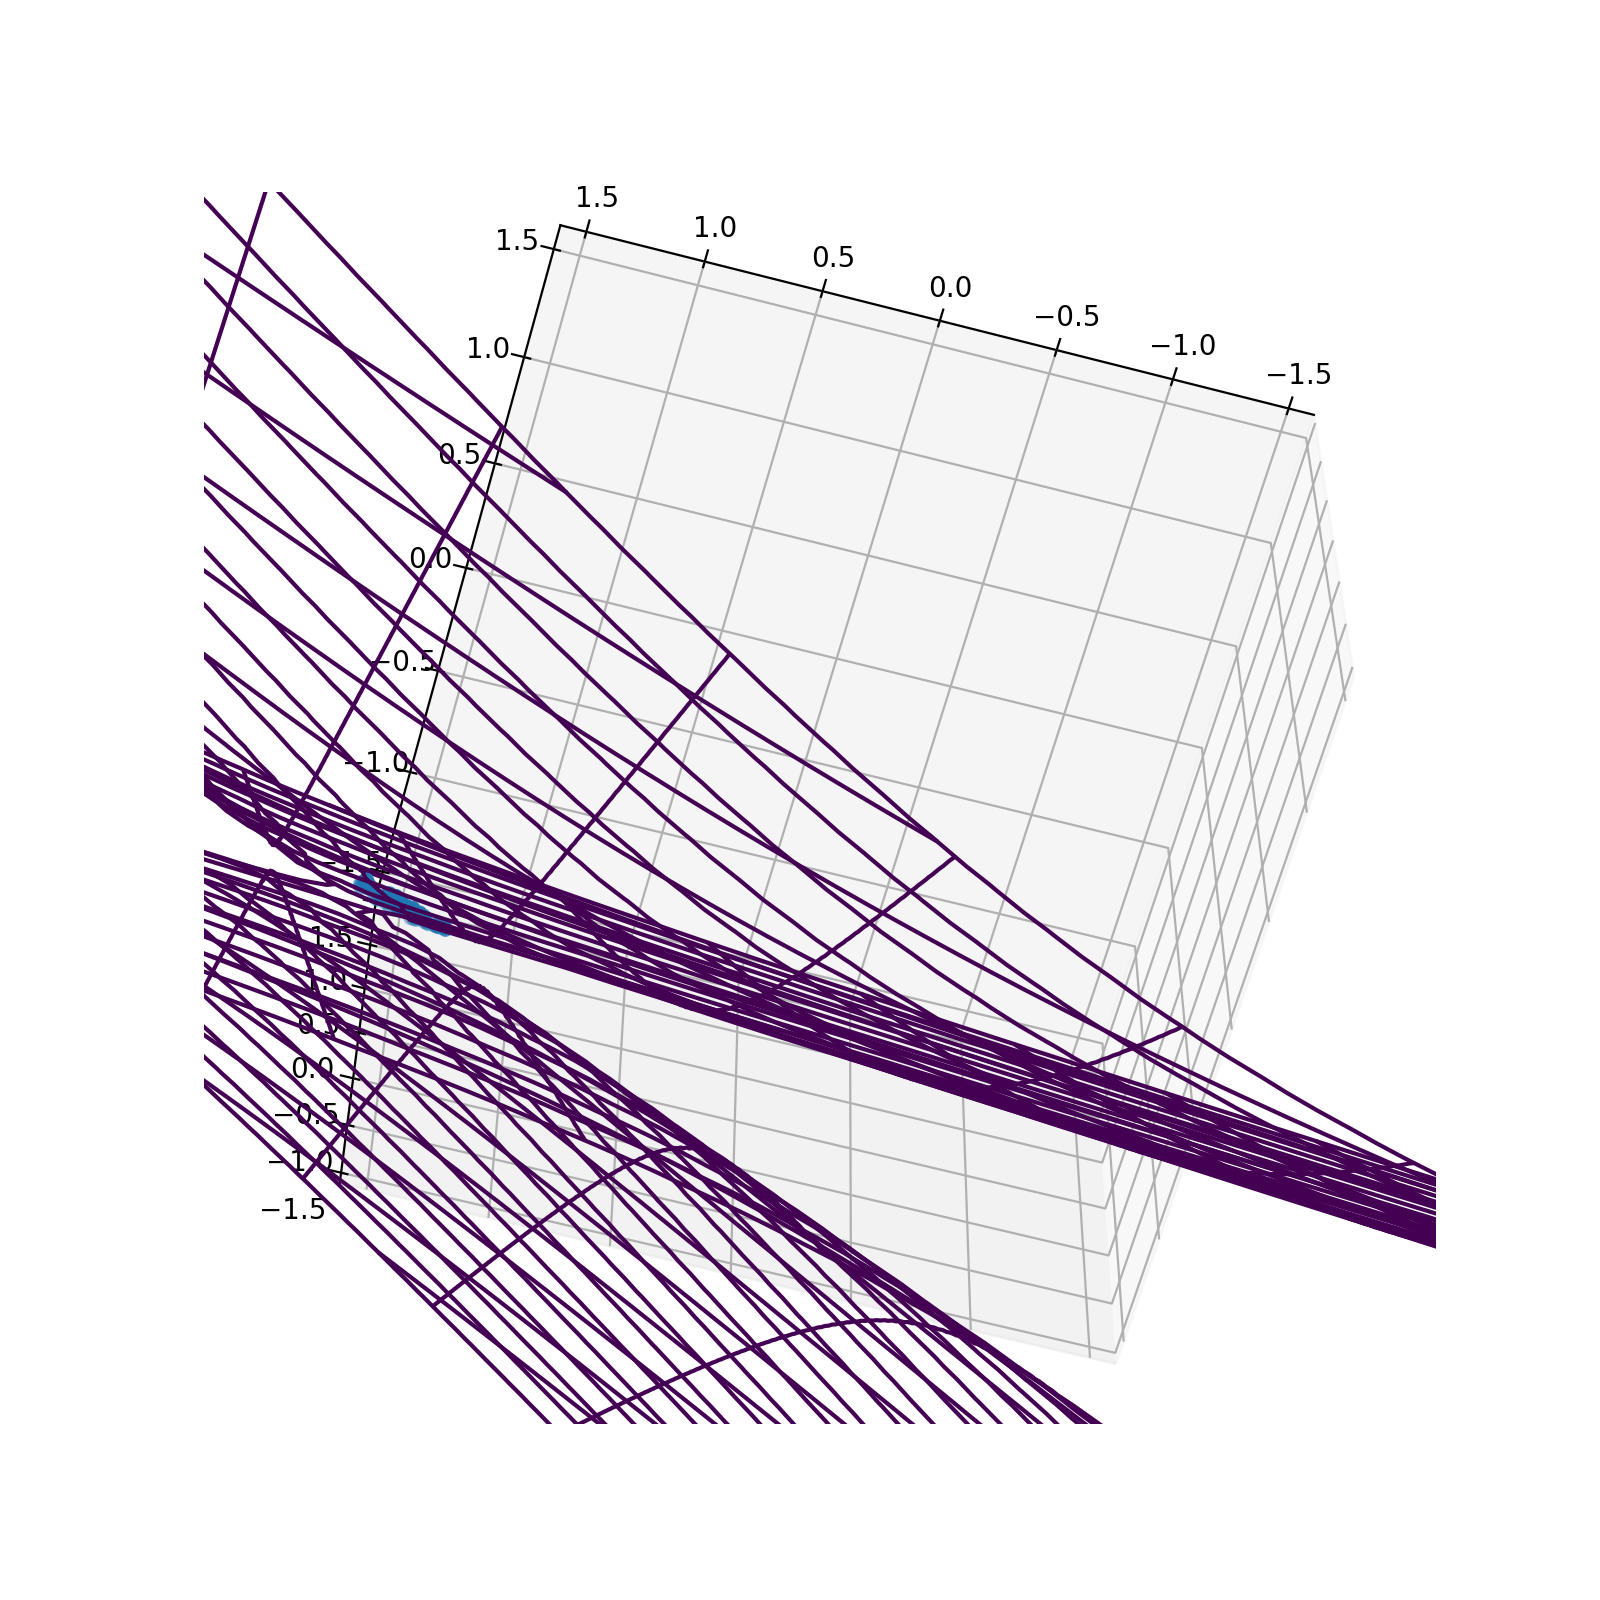

In [185]:
plot_implicit(surf, outliers, (-8,8))

In [189]:
to_file("balls_and_dists/outlier_square5.txt", outliers)